
# **INTRODUCTION**

Heart/cardiovascular diseases are a leading cause of death globally. Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. Some risk factors for cvds cannot be controlled, like age or genetic factors, but lifestyle (diet, tobacco use etc) can play a major role in increasing the risk because of how various body systems are affected. The world health organization reports that in 2019, about 32% of global deaths were caused by heart diseases. These statistics highlight why combating cardiovascular disease should be prioritized.

# **DEFINING OUR QUESTION**

Determining whether or not the patient has heart disease 

# **METRIC FOR SUCCESS**

# **UNDERSTANDING CONTEXT**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease

# **RECORDING EXPERIMENTAL DESIGN**

# **RELEVANCE OF DATA**

The provided data was appropriate for descriptive and  classification analysis that was needed.



# **DATA LOADING**

# **Importing our libraries**

In [1]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import matplotlib.pyplot   as plt
import matplotlib
import scipy as sp
# A grid layout to place subplots within a figure.
import matplotlib.gridspec as gridspec


import warnings
warnings.filterwarnings('ignore')


import pandas_profiling as pp

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error,  r2_score 
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
def settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
settings()

Populating the interactive namespace from numpy and matplotlib


# **Loading Data**

In [6]:
#reading csv file

df= pd.read_csv('heart.csv')

In [7]:
#previewing top rows
df.head(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1


In [9]:
#previewing bottom 4 rows
df.tail(4)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [11]:
# checking for the dimentionality of our dataset
df.shape

#our dataset has 12 features and  rows 918

(918, 12)

In [12]:
#Checking for more information about our dataset in terms of datatypes,null etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
#column names of the our dataset
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
#converting the columns to lowercase and removing  spaces
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [15]:
# Checking the number of unique values in the  dataset columns 



for column in df.columns:
  print(df[column].nunique())
  print(column)
  # print(results[column].unique())
  print('\n')

50
age


2
sex


4
chestpaintype


67
restingbp


222
cholesterol


2
fastingbs


3
restingecg


119
maxhr


2
exerciseangina


53
oldpeak


3
st_slope


2
heartdisease




# **DATA CLEANING**

***Missing values***

In [16]:
#checking for missing values
df.isnull().sum()


#no null values in dataset

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

***Duplicates***

In [17]:
# Checking for duplicates
df.duplicated().sum()

#no duplicates in our dataset

0

***outliers***

In [19]:
#Outliers
# checking for outliers using IQR Scores
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)).sum()

,age,chestpaintype,cholesterol,exerciseangina,fastingbs,heartdisease,maxhr,oldpeak,restingbp,restingecg,sex,st_slope
0,False,False,True,False,True,False,False,True,True,False,False,False
1,False,False,True,False,True,False,False,True,True,False,False,False
2,False,False,True,False,True,False,False,True,True,False,False,False
3,False,False,True,False,True,False,False,True,True,False,False,False
4,False,False,True,False,True,False,False,True,True,False,False,False
5,False,False,True,False,True,False,False,True,True,False,False,False
6,False,False,True,False,True,False,False,True,True,False,False,False
7,False,False,True,False,True,False,False,True,True,False,False,False
8,False,False,True,False,True,False,False,True,True,False,False,False
9,False,False,True,False,True,False,False,True,True,False,False,False


In [20]:
df.head(1)

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


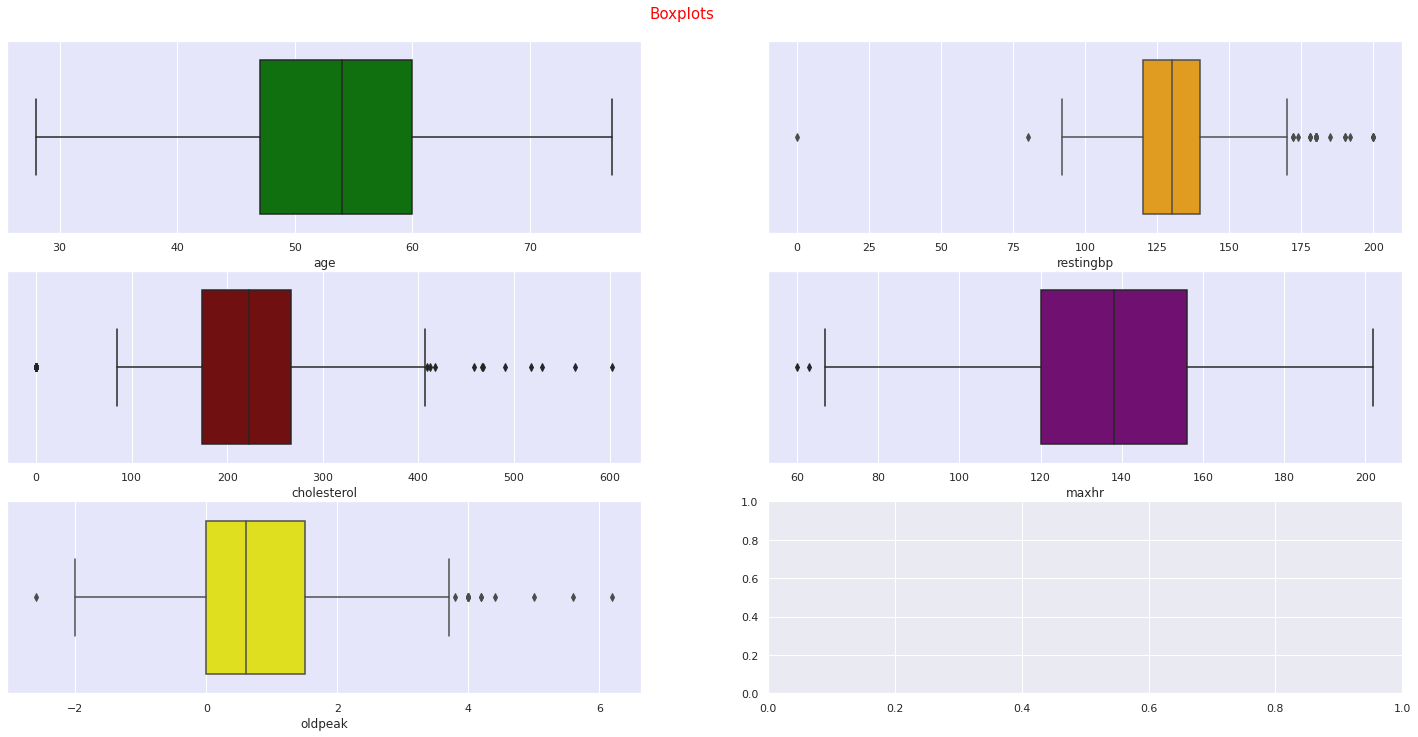

In [21]:
#visualizing the above outiers

# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['age','restingbp','cholesterol','maxhr','oldpeak']
colors = ['green','orange','maroon','purple','yellow']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2)
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'red')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

We have a profusion of ouliers in the features oldpeak, cholestral and restingbp which might be due to variability in our data thus we will not  be dropping them to see how it will affect our model

In [22]:
#saving our clean dataset
df.to_csv('clean-heart',index=False)

# **Descriptive Data analysis**

In [23]:
#general statistical summaries of the numerical variables
df.describe()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Text(0.5, 1.0, 'Distribution of age')

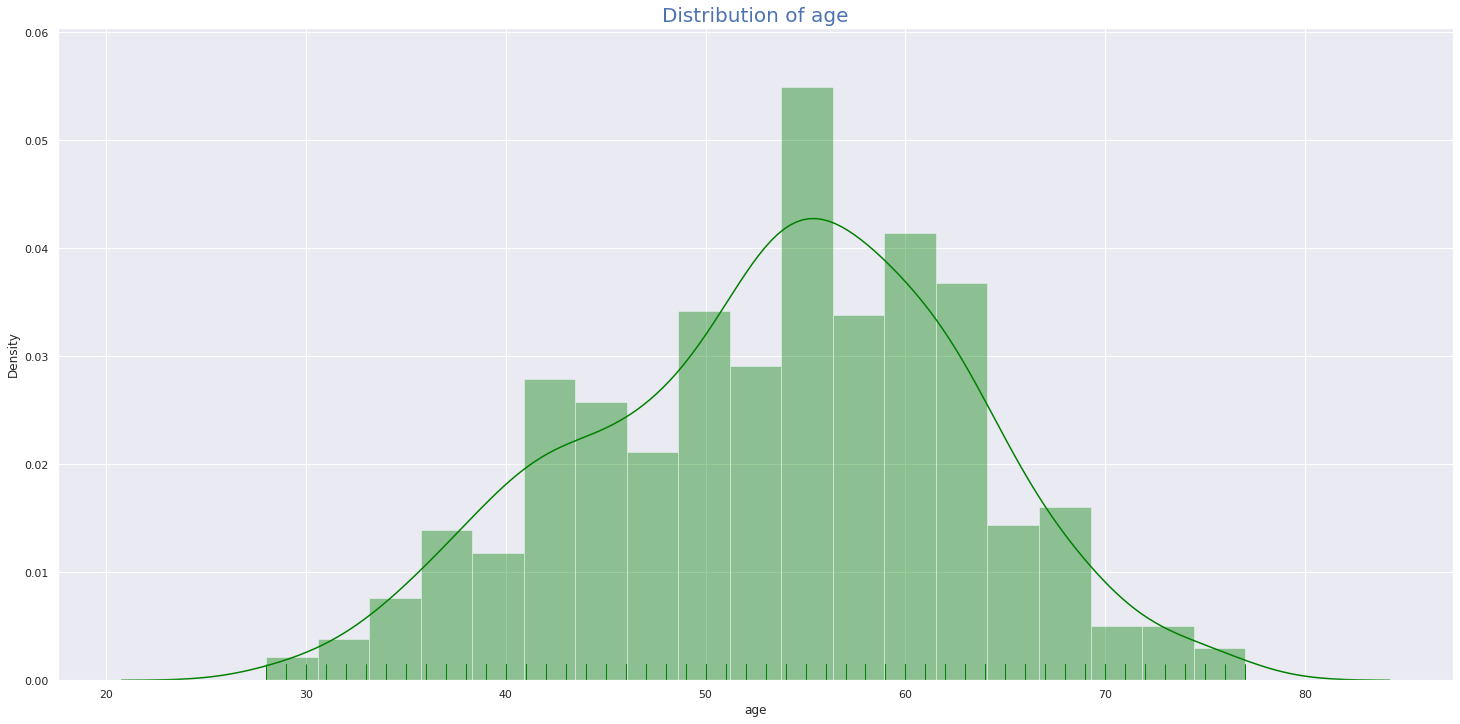

In [28]:
#distribution of the age variable
plt.figure()
plt.subplot()
sns.distplot(df["age"],color="green",rug=True)

plt.title("Distribution of age",color='b', fontsize= 20)

Text(0.5, 1.0, 'Distribution of cholesterol')

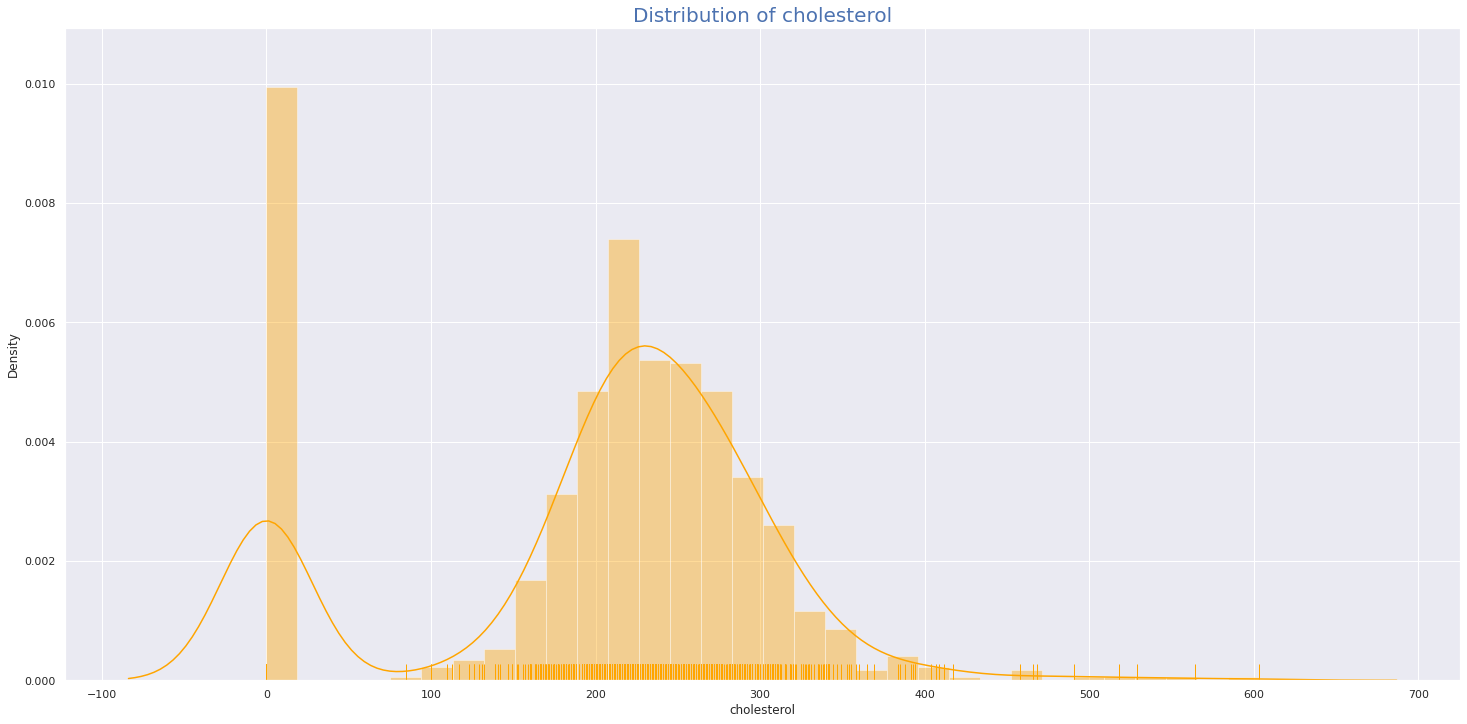

In [29]:
#distribution of the goals for home teams
plt.figure()
plt.subplot()
sns.distplot(df["cholesterol"],color="orange",rug=True)

plt.title("Distribution of cholesterol",color='b',fontsize = 20)

Text(0, 0.5, 'Count')

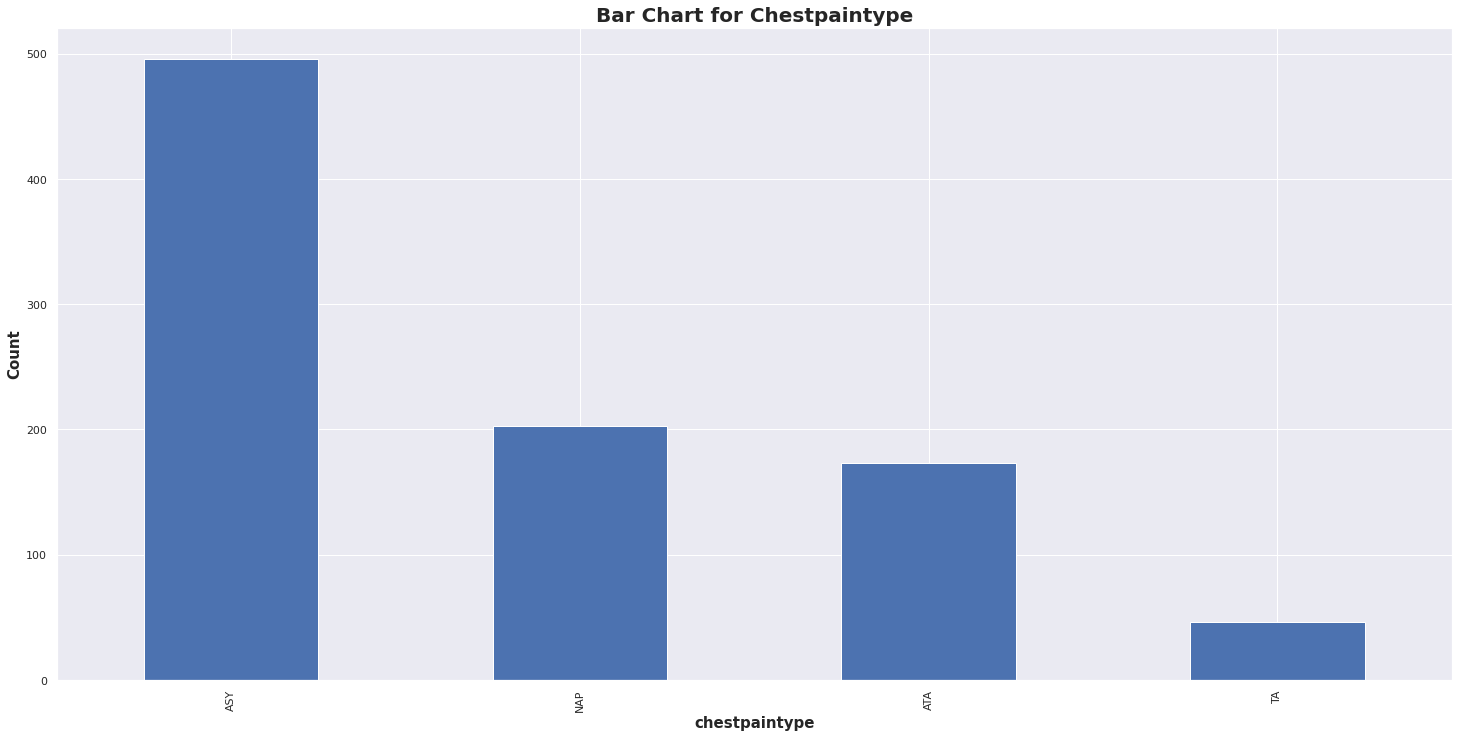

In [31]:
plt.figure()
plotdata = df['chestpaintype'].value_counts()
plotdata.plot(kind="bar")
plt.title('Bar Chart for Chestpaintype', fontweight='bold',fontsize=20)
plt.xlabel('chestpaintype',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)

Text(0, 0.5, 'heartdisease')

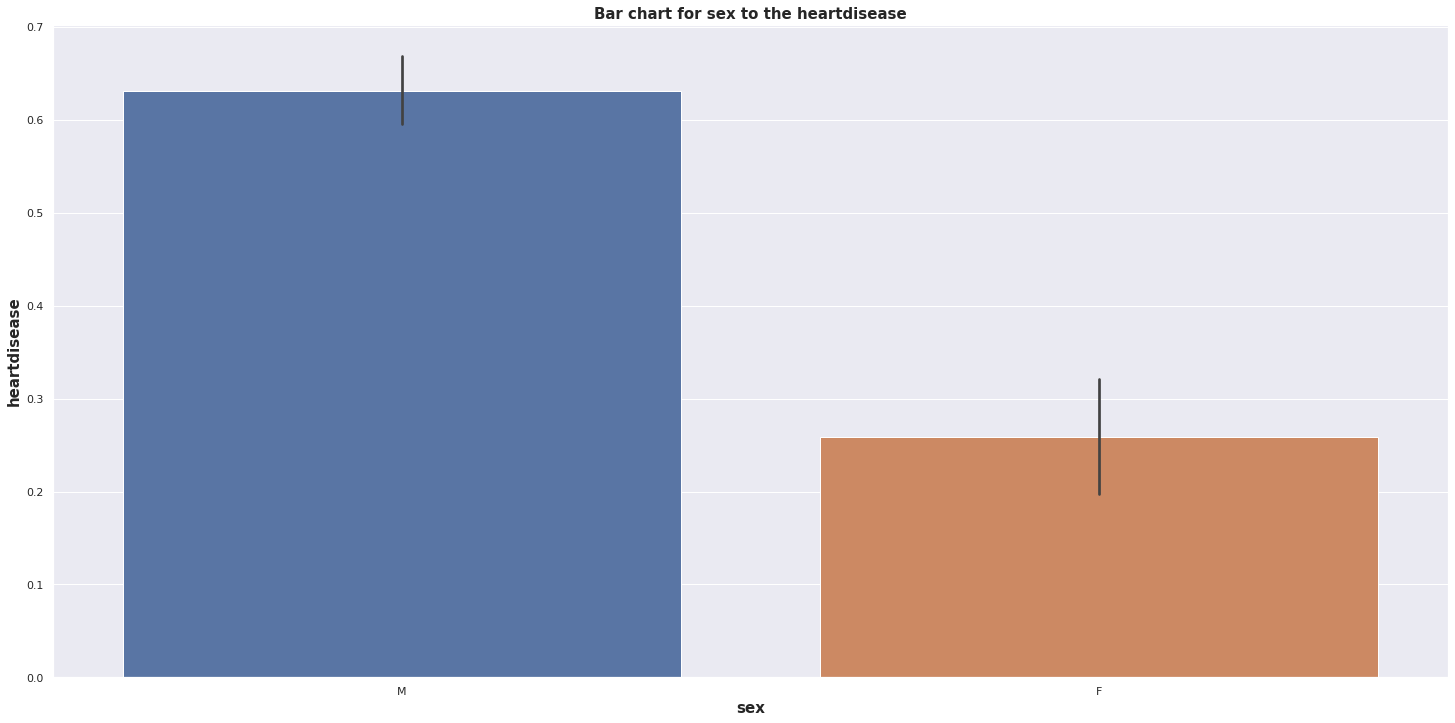

In [30]:
#Bar chart for sex to heart disease
plt.figure()
ax = sns.barplot(x="sex", y="heartdisease", data=df)
plt.title('Bar chart for sex to the heartdisease', fontweight='bold',fontsize=15)
plt.xlabel('sex',fontweight='bold',fontsize=15)
plt.ylabel('heartdisease',fontweight='bold',fontsize=15)

Text(0, 0.5, 'restingecg')

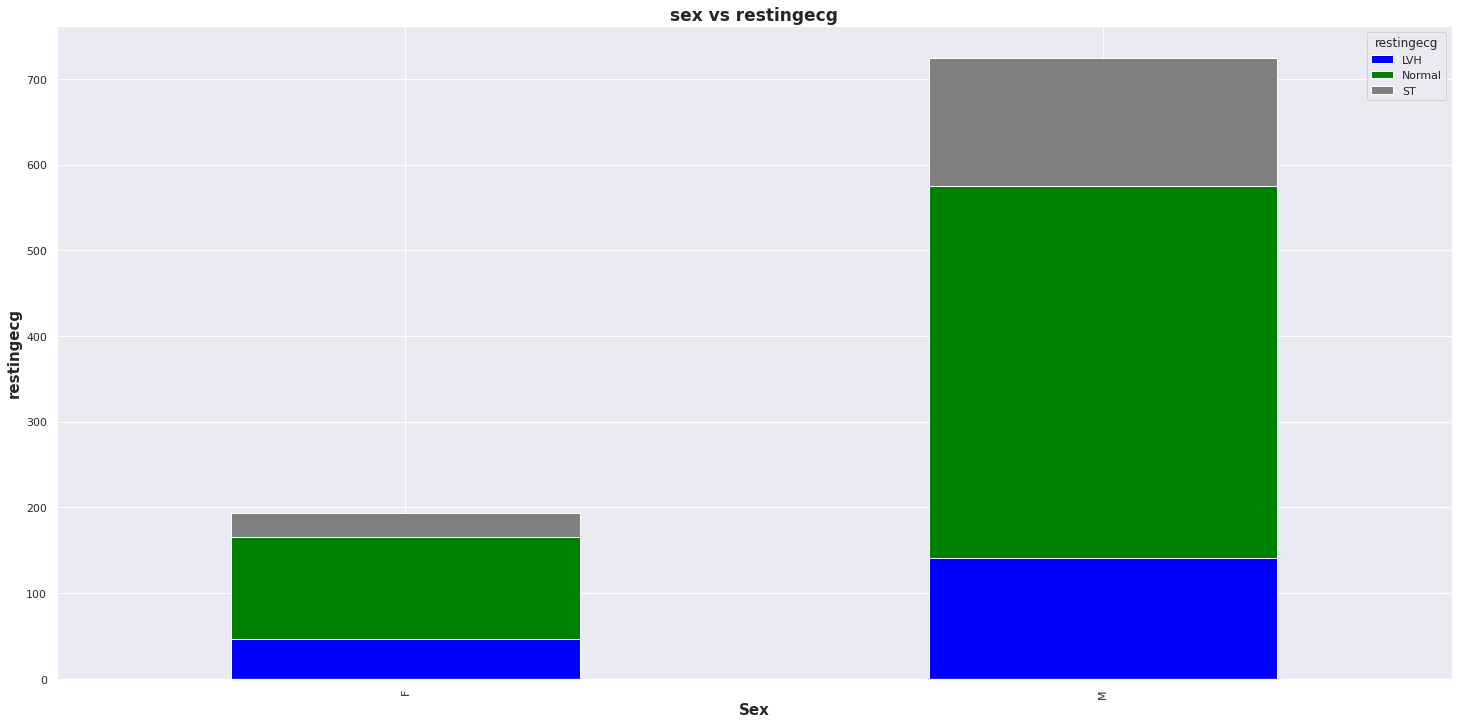

In [33]:
#Stacked bar chart of weekday with day type
pd.crosstab(df['sex'],df['restingecg']).plot(kind="bar",stacked=True, color=['blue','green','grey'])
plt.title('sex vs restingecg', fontweight='bold', fontsize=17)
plt.xlabel('Sex', fontweight='bold', fontsize=15)
plt.ylabel('restingecg', fontweight='bold', fontsize=15)

In [39]:
#checking for multicolinearity
columns =['age','restingbp','cholesterol','maxhr','oldpeak']

correlations = df[columns].corr()
correlations

,age,restingbp,cholesterol,maxhr,oldpeak
age,1.000000,0.254399,-0.095282,-0.382045,0.258612
restingbp,0.254399,1.000000,0.100893,-0.112135,0.164803
cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
maxhr,-0.382045,-0.112135,0.235792,1.000000,-0.160691
oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


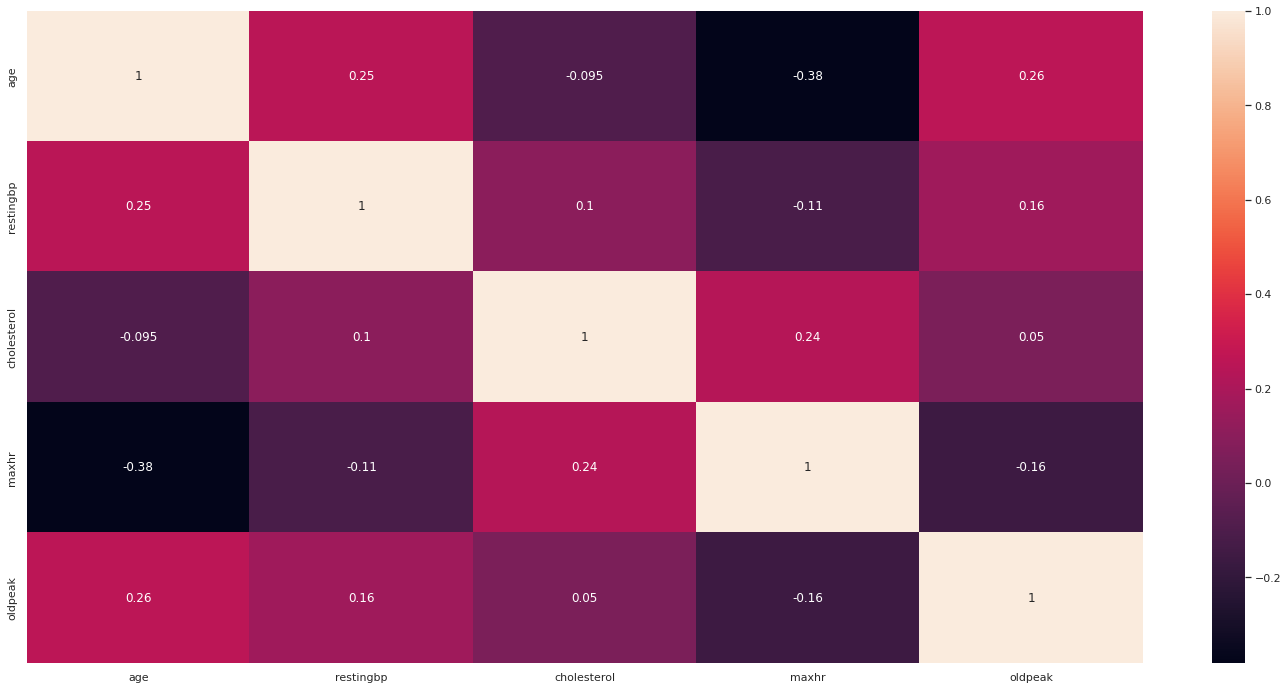

In [40]:
#correlation matrix
#  showing correlation on a heatmap
columns =['age','restingbp','cholesterol','maxhr','oldpeak']
plt.figure()
sns.heatmap(df[columns].corr(),annot=True)
plt.show()

The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable. This will require a little bit of linear algebra, but the approach is straightforward: we create a new dataframe with the inverse of the matrix above.

In [41]:
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,age,restingbp,cholesterol,maxhr,oldpeak
age,1.285821,-0.249547,0.062008,0.411949,-0.228315
restingbp,-0.249547,1.099498,-0.140065,0.044511,-0.102488
cholesterol,0.062008,-0.140065,1.086453,-0.262597,-0.089633
maxhr,0.411949,0.044511,-0.262597,1.240133,0.098576
oldpeak,-0.228315,-0.102488,-0.089633,0.098576,1.096271


# **FEATURE ENGINEERING**

In [42]:
# Encoding the categorical columns 
#

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [43]:
# Confirming the changes

df_encoded.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0


# **DATA MODELLING**